In [ ]:
import zipfile
import os

zip_path = 'potato.zip'  # Adjust this to your zip file's path
extract_to = '/content'  # Directory where you want to extract the dataset

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)



In [ ]:
import tensorflow as tf
from tensorflow .keras import models,layers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=5
steps_per_epoch=10


In [ ]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "potato",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [ ]:
class_names=dataset.class_names

In [ ]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
len(dataset)

68

In [ ]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 2 1 0 0 0 0 1 1 1 2 0 1 0 0]


In [ ]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[179. 177. 188.]
  [182. 180. 191.]
  [185. 183. 194.]
  ...
  [143. 140. 149.]
  [147. 144. 153.]
  [147. 144. 153.]]

 [[186. 184. 195.]
  [188. 186. 197.]
  [187. 185. 196.]
  ...
  [142. 139. 148.]
  [140. 137. 146.]
  [137. 134. 143.]]

 [[179. 177. 188.]
  [182. 180. 191.]
  [182. 180. 191.]
  ...
  [160. 157. 166.]
  [162. 159. 168.]
  [155. 152. 161.]]

 ...

 [[197. 194. 201.]
  [198. 195. 202.]
  [199. 196. 203.]
  ...
  [167. 162. 168.]
  [153. 148. 154.]
  [148. 143. 149.]]

 [[201. 198. 205.]
  [201. 198. 205.]
  [202. 199. 206.]
  ...
  [161. 156. 162.]
  [158. 153. 159.]
  [173. 168. 174.]]

 [[204. 201. 208.]
  [205. 202. 209.]
  [205. 202. 209.]
  ...
  [170. 165. 171.]
  [155. 150. 156.]
  [160. 155. 161.]]]


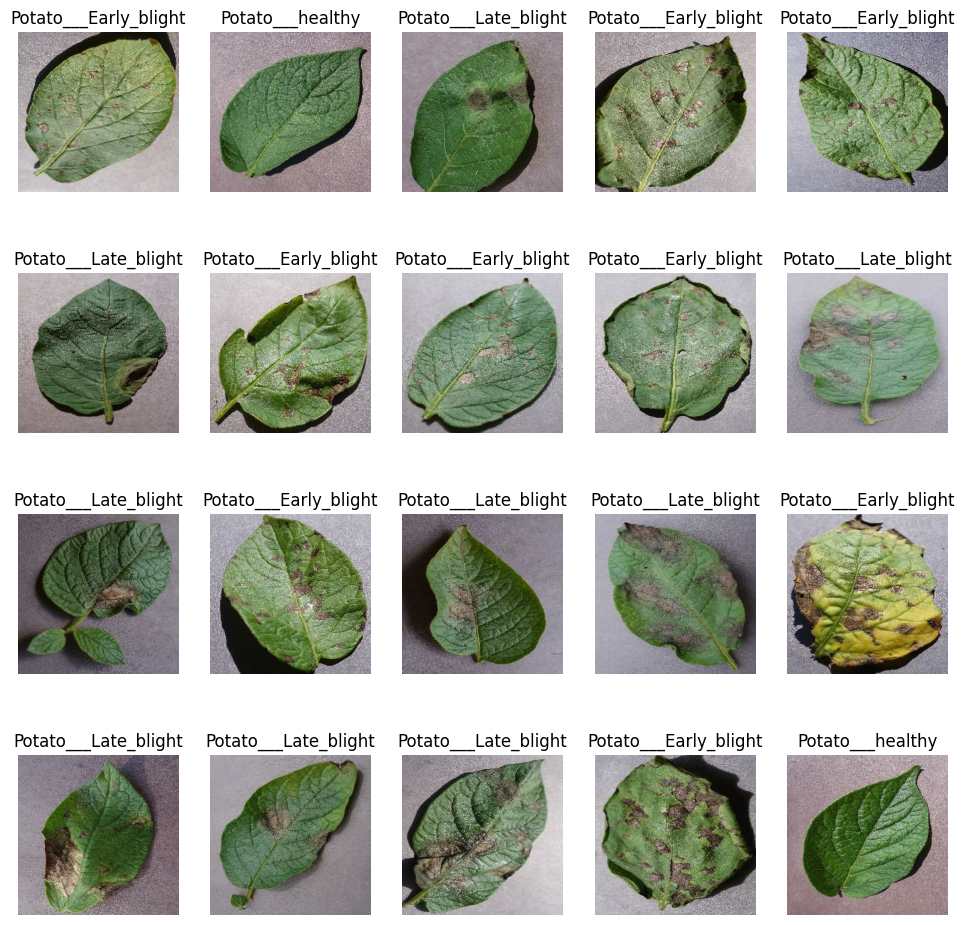

In [ ]:
plt.figure(figsize=(12,12))
for image_batch,label_batch in dataset.take(1):
    for i in range(20):
        ax=plt.subplot(4,5,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

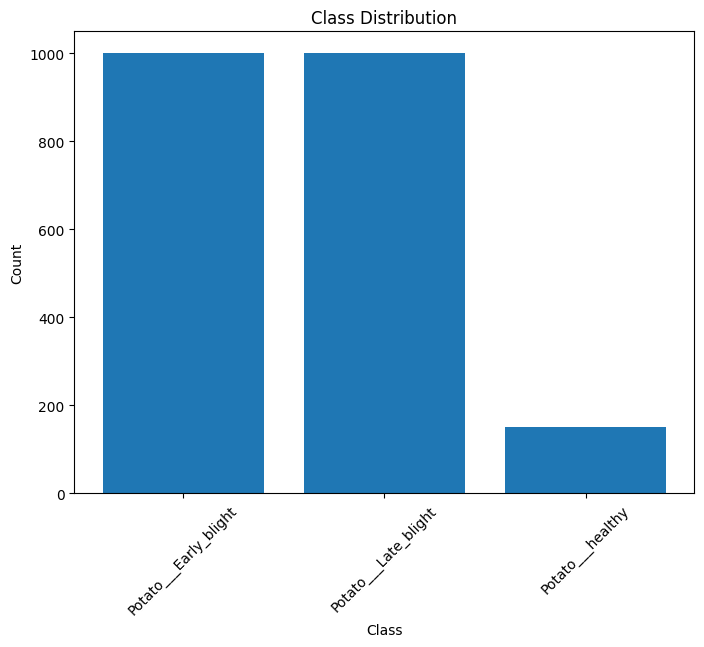

In [ ]:
#It willl perform class distribution
plt.figure(figsize=(8, 6))
class_counts = [0] * len(class_names)
for _, labels in dataset:
    for label in labels.numpy():
        class_counts[label] += 1
plt.bar(class_names, class_counts)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Compute and visualize mean and standard deviation of pixel values
mean_pixels = []
std_pixels = []
for images, _ in dataset:
    mean_pixels.append(tf.math.reduce_mean(images, axis=[0, 1, 2]))
    std_pixels.append(tf.math.reduce_std(images, axis=[0, 1, 2]))

mean_pixels = tf.math.reduce_mean(mean_pixels, axis=0)
std_pixels = tf.math.reduce_mean(std_pixels, axis=0)
print("Mean pixel values:", mean_pixels.numpy())
print("Standard deviation of pixel values:", std_pixels.numpy())


Mean pixel values: [125.99723 130.44559 108.83885]
Standard deviation of pixel values: [48.823566 45.279682 54.659256]


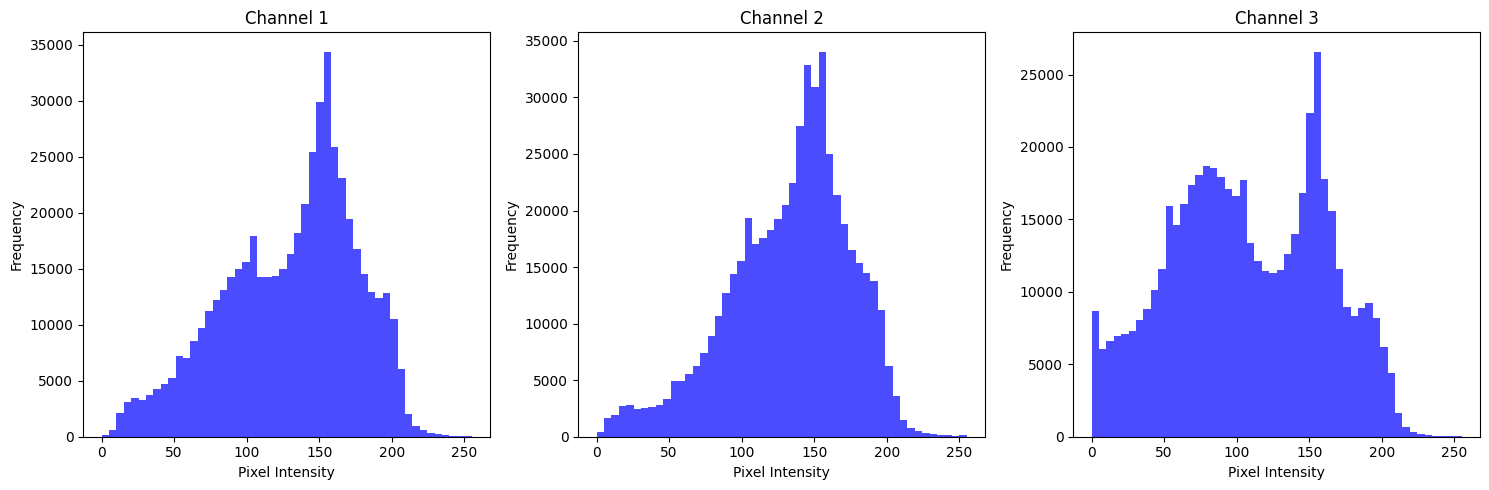

In [ ]:
# Plot histogram of pixel intensities for each channel
plt.figure(figsize=(15, 5))
for i in range(CHANNELS):
    plt.subplot(1, CHANNELS, i + 1)
    plt.hist(images[:, :, :, i].numpy().flatten(), bins=50, color='blue', alpha=0.7)
    plt.title(f'Channel {i+1}')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
#Split dataset into train_ds,val_ds,test_ds.
def get_dataset_partition_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=121)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [ ]:
train_ds,val_ds,test_ds=get_dataset_partition_tf(dataset)

In [ ]:
len(train_ds)

54

In [ ]:
len(val_ds)

6

In [ ]:
len(test_ds)

8

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale=tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [ ]:
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [ ]:
resize_and_rescale

In [ ]:
data_augmentation

In [ ]:
IMAGE_SIZE

256

In [ ]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3

VGG(without finetuning)

In [ ]:
#VggNet
from tensorflow.keras.applications import VGG16


In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS))


58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False


In [ ]:
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(n_classes, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='Adam',  # Lower learning rate for fine-tuning
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])
model.build(input_shape=input_shape)


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,batch_size=BATCH_SIZE,validation_data=val_ds,verbose=1,epochs=EPOCHS)

Epoch 1/5
54/54 [==============================] - 18s 142ms/step - loss: 0.9294 - accuracy: 0.4730 - val_loss: 0.8804 - val_accuracy: 0.5312
Epoch 2/5
54/54 [==============================] - 3s 60ms/step - loss: 0.8885 - accuracy: 0.4947 - val_loss: 0.7914 - val_accuracy: 0.5521
Epoch 3/5
54/54 [==============================] - 3s 62ms/step - loss: 0.8416 - accuracy: 0.5593 - val_loss: 0.6327 - val_accuracy: 0.7240
Epoch 4/5
54/54 [==============================] - 3s 59ms/step - loss: 0.6512 - accuracy: 0.7248 - val_loss: 0.4241 - val_accuracy: 0.8385
Epoch 5/5
54/54 [==============================] - 3s 60ms/step - loss: 0.3982 - accuracy: 0.8404 - val_loss: 0.4808 - val_accuracy: 0.8125


In [ ]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 3s 29ms/step - loss: 0.4984 - accuracy: 0.8008


In [ ]:
scores

[0.4984104037284851, 0.80078125]

In [ ]:
accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']


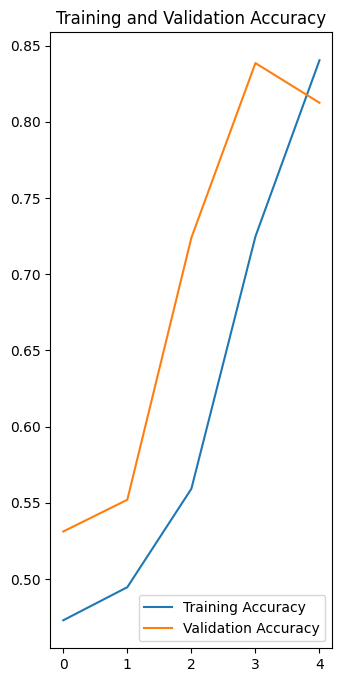

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),accuracy,label='Training Accuracy')
plt.plot(range(EPOCHS),val_accuracy,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")
plt.show()

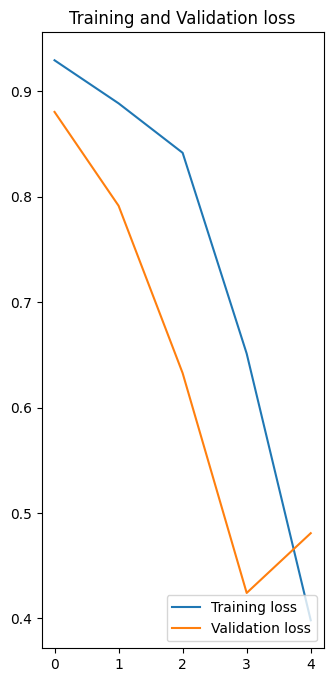

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),loss,label='Training loss')
plt.plot(range(EPOCHS),val_loss,label='Validation loss')
plt.legend(loc='lower right')
plt.title("Training and Validation loss")
plt.show()

First Image to predict
Actual Label: Potato___Late_blight
1/1 [==============================] - 0s 152ms/step
Predicted Label: Potato___Late_blight


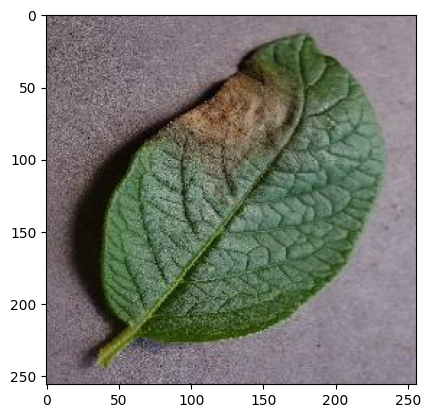

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype("uint8")
    print("First Image to predict")
    plt.imshow(first_image)
    print("Actual Label:",class_names[labels_batch[0].numpy()])

    batch_prediction=model.predict(images_batch)
    print("Predicted Label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)

    predictions=model.predict(img_array)

    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 19ms/step


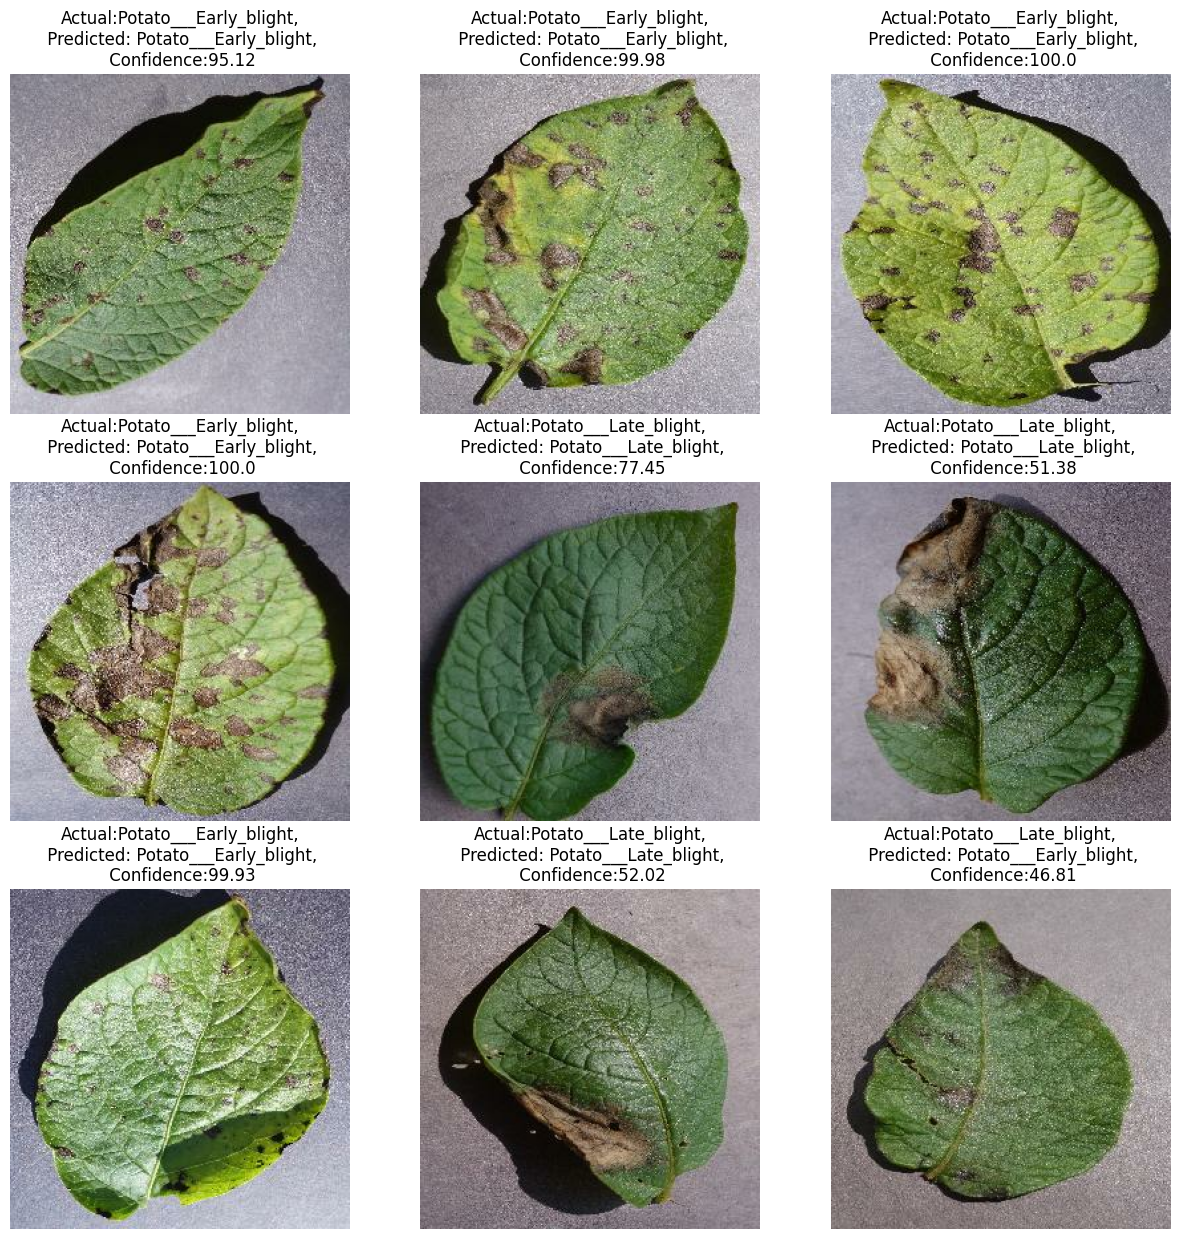

In [ ]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class,confidence=predict(model,images[i].numpy())

        actual_class =class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted: {predicted_class},\n Confidence:{confidence}")
        plt.axis("off")

VGG(with finetuning)

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [ ]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(256,256,3)
)

In [ ]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_2 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [ ]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
  )

In [ ]:
history = model.fit(train_ds,epochs=5,validation_data=val_ds)

Epoch 1/5
54/54 [==============================] - 22s 243ms/step - loss: 1.6020 - accuracy: 0.7746 - val_loss: 0.1663 - val_accuracy: 0.9531
Epoch 2/5
54/54 [==============================] - 10s 189ms/step - loss: 0.1262 - accuracy: 0.9671 - val_loss: 0.1280 - val_accuracy: 0.9635
Epoch 3/5
54/54 [==============================] - 10s 192ms/step - loss: 0.0072 - accuracy: 0.9982 - val_loss: 0.0919 - val_accuracy: 0.9688
Epoch 4/5
54/54 [==============================] - 11s 201ms/step - loss: 0.0013 - accuracy: 0.9994 - val_loss: 0.0820 - val_accuracy: 0.9740
Epoch 5/5
54/54 [==============================] - 11s 198ms/step - loss: 5.5161e-05 - accuracy: 1.0000 - val_loss: 0.0713 - val_accuracy: 0.9844


In [ ]:
scores=model.evaluate(test_ds)

8/8 [==============================] - 1s 166ms/step - loss: 0.0671 - accuracy: 0.9805


In [ ]:
scores

[0.06714436411857605, 0.98046875]

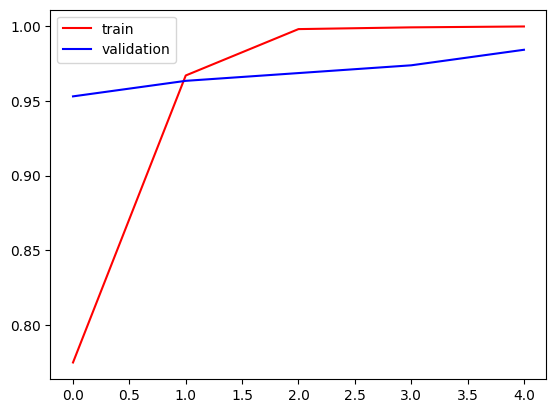

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

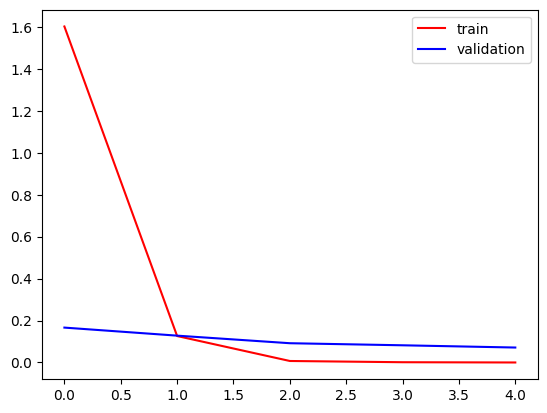

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

First Image to predict
Actual Label: Potato___Early_blight
1/1 [==============================] - 0s 140ms/step
Predicted Label: Potato___Early_blight


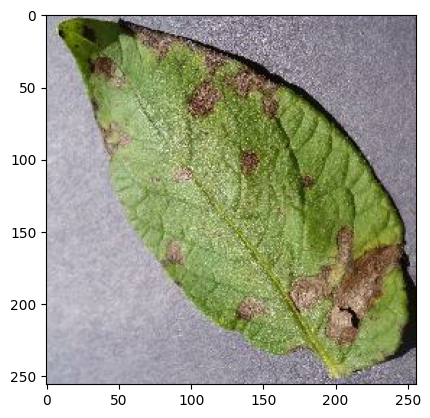

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype("uint8")
    print("First Image to predict")
    plt.imshow(first_image)
    print("Actual Label:",class_names[labels_batch[0].numpy()])

    batch_prediction=model.predict(images_batch)
    print("Predicted Label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)

    predictions=model.predict(img_array)

    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 25ms/step


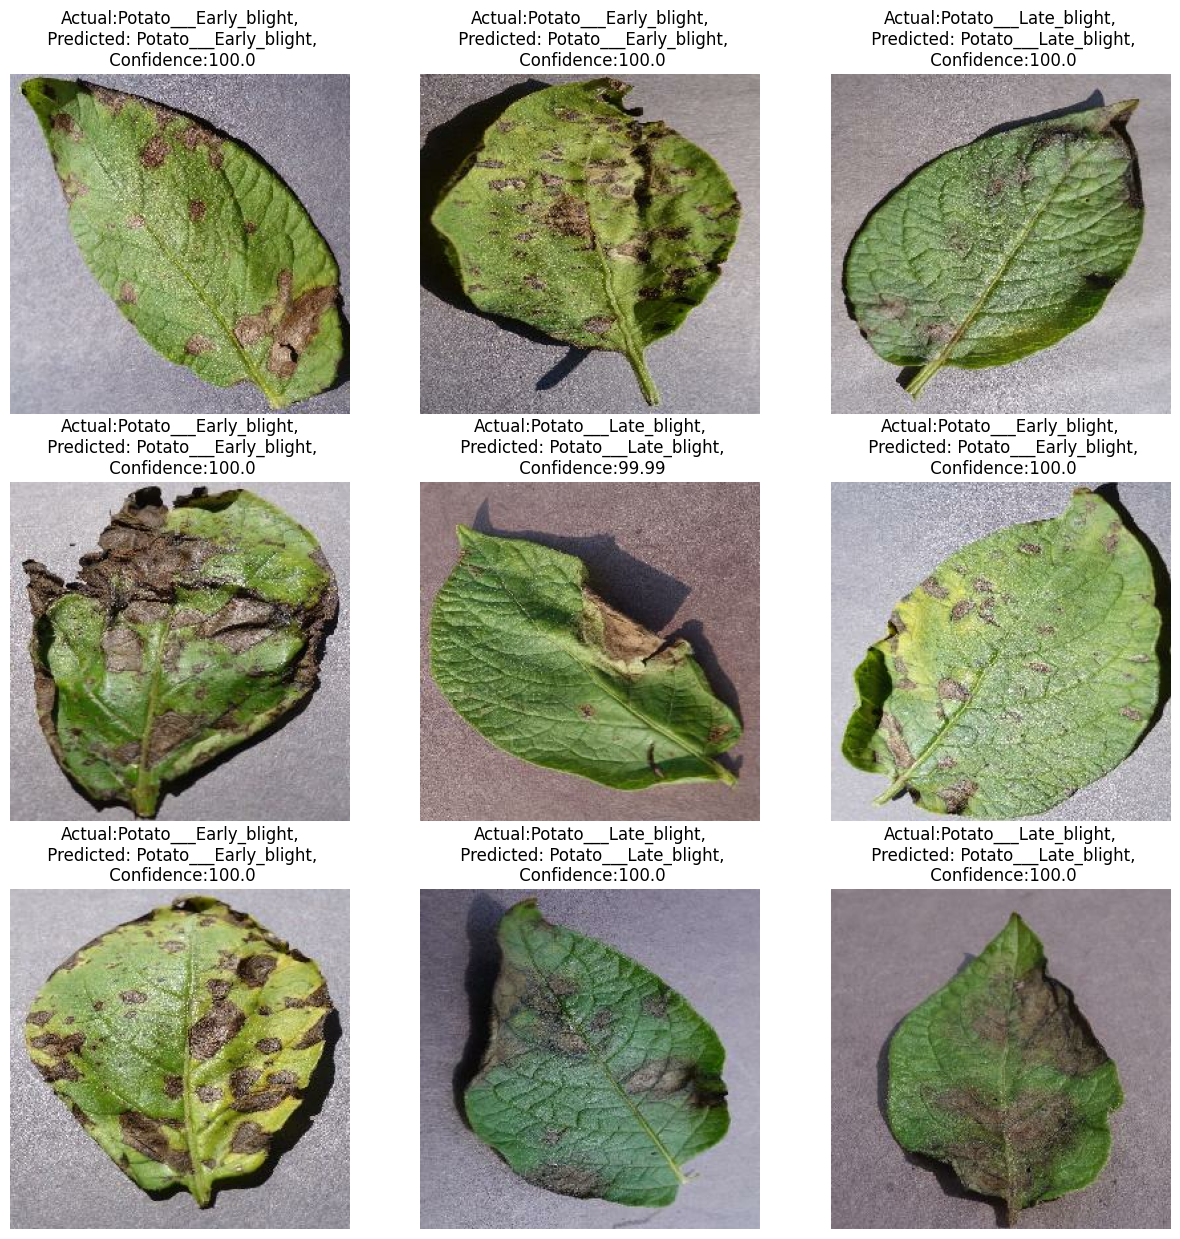

In [ ]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class,confidence=predict(model,images[i].numpy())

        actual_class =class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted: {predicted_class},\n Confidence:{confidence}")
        plt.axis("off")

RESNET50 MODEL

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(CHANNELS, activation='softmax')(x)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
class_mode='categorical'

In [ ]:
history = model.fit(train_ds, epochs=EPOCHS, validation_data=val_ds)



Epoch 1/5
54/54 [==============================] - 16s 178ms/step - loss: 0.3395 - accuracy: 0.9008 - val_loss: 0.0635 - val_accuracy: 0.9792
Epoch 2/5
54/54 [==============================] - 7s 128ms/step - loss: 0.0762 - accuracy: 0.9683 - val_loss: 0.0421 - val_accuracy: 0.9844
Epoch 3/5
54/54 [==============================] - 7s 129ms/step - loss: 0.0382 - accuracy: 0.9883 - val_loss: 0.0558 - val_accuracy: 0.9896
Epoch 4/5
54/54 [==============================] - 7s 131ms/step - loss: 0.0362 - accuracy: 0.9871 - val_loss: 0.0427 - val_accuracy: 0.9844
Epoch 5/5
54/54 [==============================] - 8s 144ms/step - loss: 0.0177 - accuracy: 0.9965 - val_loss: 0.0184 - val_accuracy: 0.9948


In [ ]:
loss, accuracy = model.evaluate(test_ds)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

8/8 [==============================] - 1s 124ms/step - loss: 0.0113 - accuracy: 1.0000
Test Loss: 0.011335867457091808
Test Accuracy: 1.0


EFFICIENTNETB1 MODEL

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetB1

In [ ]:
base_model = EfficientNetB1(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS))

27018416/27018416 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(CHANNELS, activation='softmax')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=EPOCHS, validation_data=val_ds)

Epoch 1/5
54/54 [==============================] - 27s 202ms/step - loss: 0.1997 - accuracy: 0.9196 - val_loss: 0.0822 - val_accuracy: 0.9740
Epoch 2/5
54/54 [==============================] - 6s 115ms/step - loss: 0.0547 - accuracy: 0.9818 - val_loss: 0.0349 - val_accuracy: 0.9896
Epoch 3/5
54/54 [==============================] - 6s 119ms/step - loss: 0.0348 - accuracy: 0.9906 - val_loss: 0.0317 - val_accuracy: 0.9896
Epoch 4/5
54/54 [==============================] - 6s 117ms/step - loss: 0.0188 - accuracy: 0.9947 - val_loss: 0.0211 - val_accuracy: 0.9948
Epoch 5/5
54/54 [==============================] - 6s 120ms/step - loss: 0.0184 - accuracy: 0.9930 - val_loss: 0.0186 - val_accuracy: 0.9948


In [ ]:
loss, accuracy = model.evaluate(test_ds)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

8/8 [==============================] - 1s 118ms/step - loss: 0.0089 - accuracy: 0.9961
Test Loss: 0.008875610306859016
Test Accuracy: 0.99609375
